# Set up

In [37]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.colors import ListedColormap
import seaborn as sns

import csv
import pandas as pd
import numpy as np  
from io import StringIO
from urllib import request

import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import ShuffleSplit
from sklearn import linear_model
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report, cohen_kappa_score

np.random.seed(42)

# configurations for plots
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# set the path to save figures
PROJECT_ROOT_DIR = "C:/Users/14702/OneDrive/Desktop/MSBA/Fall/Intro to BA/Project"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Import and explore data

In [3]:
########################################### Imports ###########################################

# read the dataset as a csv file
churn = pd.read_csv('Churn_Modeling.csv')

In [4]:
######################################### Data Exploration #########################################

# check if there is any missing value in any column 
print(churn.isnull().values.any())

# drop variables that are not useful in our prediction
churn = churn.drop(['RowNumber'], axis = 1)
churn = churn.drop(['CustomerId'], axis = 1)
churn = churn.drop(['Surname'], axis = 1)

# check the dimension of this dataframe
print("The shape of churn is:", churn.shape)

# check the data type of each column
churn.dtypes

# check if we have any duplicates in the dataset
duplicate_rows_df = churn[churn.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

# print features 
name = list(churn)
print("The following is all the variables we have in this dataset")
print(name)

# perform a summary statistics
print(churn.describe())

# switch the Gender column to binary variable
churn['Gender'].replace('Female', 0, inplace=True)
churn['Gender'].replace('Male', 1, inplace=True)

# retrieve attributes for target and predictor variables 
y = churn['Exited']
x = churn.drop(['Exited'], axis=1)

# explore target variable
# we noticed that we have an imbalanced target variable
unique, counts = np.unique(y, return_counts=True)
print("The frequency of instances per class is: " , dict(zip(unique, counts)))

False
The shape of churn is: (10000, 11)
number of duplicate rows:  (0, 11)
The following is all the variables we have in this dataset
['Geography', 'HasCrCard', 'IsActiveMember', 'Gender', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Exited']
         HasCrCard  IsActiveMember   CreditScore           Age        Tenure  \
count  10000.00000    10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.70550        0.515100    650.528800     38.921800      5.012800   
std        0.45584        0.499797     96.653299     10.487806      2.892174   
min        0.00000        0.000000    350.000000     18.000000      0.000000   
25%        0.00000        0.000000    584.000000     32.000000      3.000000   
50%        1.00000        1.000000    652.000000     37.000000      5.000000   
75%        1.00000        1.000000    718.000000     44.000000      7.000000   
max        1.00000        1.000000    850.000000     92.000000     10.000000   



{'whiskers': [<matplotlib.lines.Line2D at 0x2dfa48876a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2dfa4887a58>,
 'boxes': [<matplotlib.lines.Line2D at 0x2dfa48875f8>],
 'medians': [<matplotlib.lines.Line2D at 0x2dfa4891128>],
 'fliers': [<matplotlib.lines.Line2D at 0x2dfa4891470>],
 'means': []}

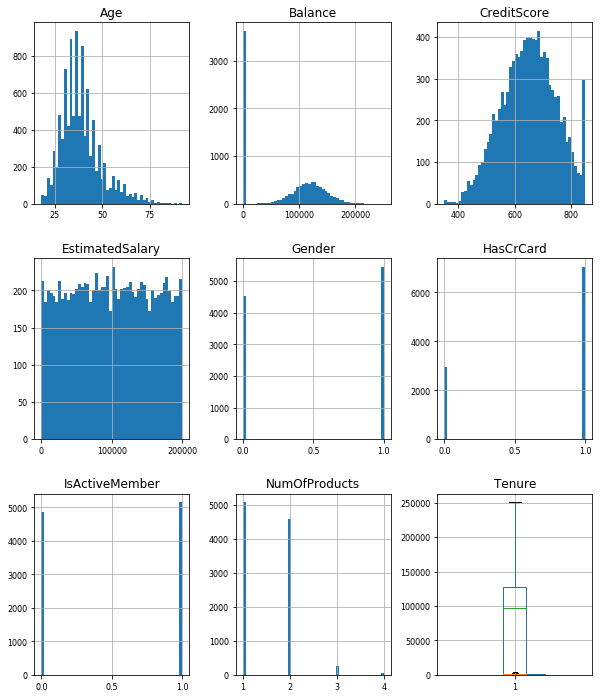

In [5]:
######################################### Visualizations #########################################

# Plot histogram for the numerical variables to see the distribition
df_num = x.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(10, 12), bins=50, xlabelsize=8, ylabelsize=8)

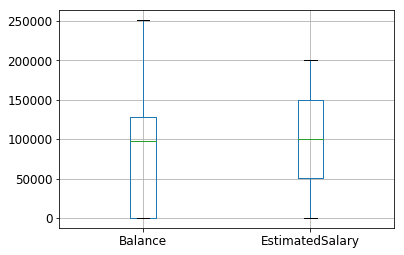

In [9]:
# generating boxplots using two x variables in the dataset cuz they are corresponding to the same y variable 
df = pd.DataFrame(data = churn, columns = ['Balance','EstimatedSalary'])
df.boxplot()

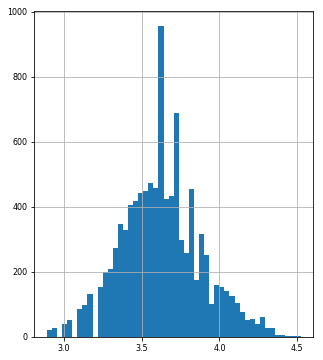

In [10]:
# log transformtion on Age variable
x['Age_log'] = np.log(x['Age'])
x['Age_log'].hist(figsize=(5, 6), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DFA4E64AC8>,
      dtype=object)

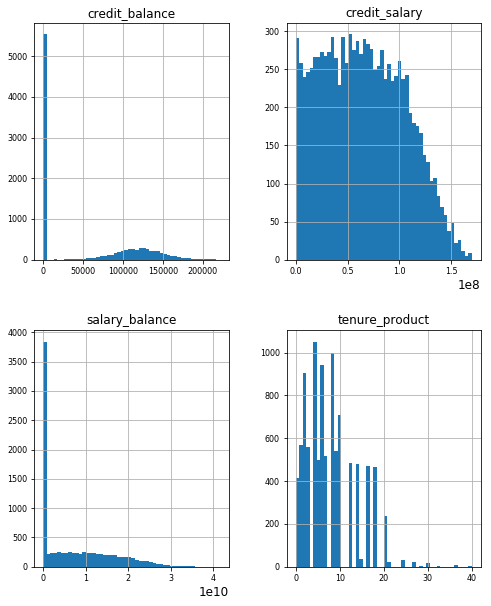

In [11]:
# generate interaction term

# Balance * EstimatedSalary
x["salary_balance"] = x["EstimatedSalary"] * x["Balance"]

# Tenure * NumofProduct 
x['tenure_product'] = x["Tenure"] * x['NumOfProducts']

# CreditScore * EstimatedSalary
x["credit_salary"] = x["CreditScore"]*x["EstimatedSalary"]

# HasCrCard * Balance
x['credit_balance'] = x['HasCrCard'] * x['Balance']

# histogram for these interaction terms to see the distribution
x_interaction = x.loc[:, 'salary_balance':'credit_balance'] 
x_interaction.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DFA4E729B0>,
      dtype=object)

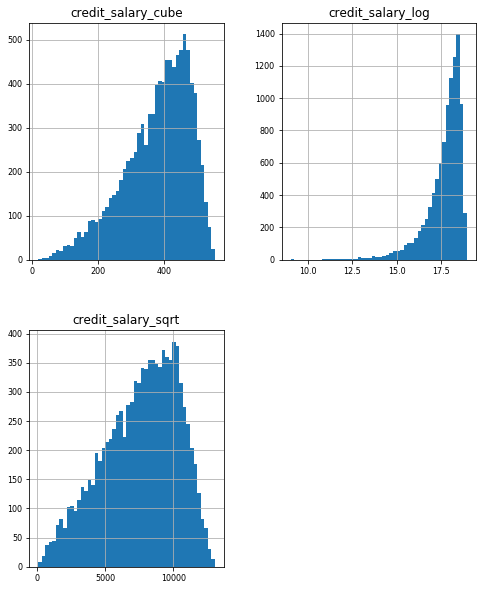

In [12]:
# transformation on credit_salary, tenure_product
x['credit_salary_log'] = np.log(x['credit_salary'])
x['credit_salary_sqrt'] = x['credit_salary'] ** (1/2)
x['credit_salary_cube'] = x['credit_salary'] ** (1/3)

credit_salary_transformation = x.loc[:, 'credit_salary_log':'credit_salary_cube'] 
credit_salary_transformation.hist(figsize=(8, 10), bins=50, xlabelsize=8, ylabelsize=8)

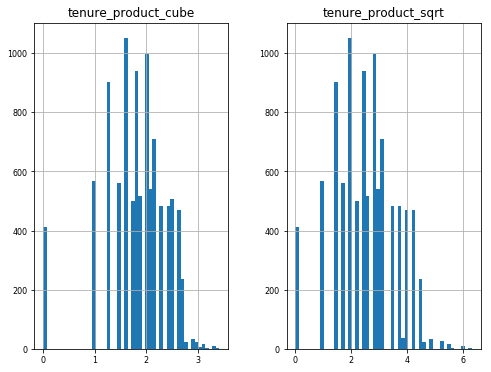

In [13]:
# transformation on tenure_product
x['tenure_product_sqrt'] = x['tenure_product'] ** (1/2)
x['tenure_product_cube'] = x['tenure_product'] ** (1/3)

tenure_product_transformation = x.loc[:, 'tenure_product_sqrt':'tenure_product_cube'] 
tenure_product_transformation.hist(figsize=(8, 6), bins=50, xlabelsize=8, ylabelsize=8)

# remove the extra columns 
x.drop(['credit_salary_cube', 'credit_salary_log', 'tenure_product_cube'], axis=1, inplace=True)

In [14]:
# encode the categorical variables 
dummy = pd.get_dummies(x['Geography'])
x = pd.concat([x, dummy], axis=1)
x.head()

,Geography,HasCrCard,IsActiveMember,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Age_log,salary_balance,tenure_product,credit_salary,credit_balance,credit_salary_sqrt,tenure_product_sqrt,France,Germany,Spain
0,France,1,1,0,619,42,2,0.00,1,101348.88,3.737670,0.000000e+00,2,62734956.72,0.00,7920.540179,1.414214,1,0,0
1,Spain,0,1,0,608,41,1,83807.86,1,112542.58,3.713572,9.431953e+09,1,68425888.64,0.00,8271.994236,1.000000,0,0,1
2,France,1,0,0,502,42,8,159660.80,3,113931.57,3.737670,1.819041e+10,24,57193648.14,159660.80,7562.648223,4.898979,1,0,0
3,France,0,0,0,699,39,1,0.00,2,93826.63,3.663562,0.000000e+00,2,65584814.37,0.00,8098.445182,1.414214,1,0,0
4,Spain,1,1,0,850,43,2,125510.82,1,79084.10,3.761200,9.925910e+09,2,67221485.00,125510.82,8198.870959,1.414214,0,0,1


In [15]:
# reselect the variables 
warnings.filterwarnings('ignore')
x_original = x
col = ['France','Germany','Spain','HasCrCard', 'IsActiveMember', 'Gender', 'CreditScore', 'Tenure' ,'Balance', 'NumOfProducts','EstimatedSalary',
      'Age_log','credit_salary_sqrt','tenure_product_sqrt', 'credit_balance','salary_balance']
x = x.loc[:, col] 
x.head()

,France,Germany,Spain,HasCrCard,IsActiveMember,Gender,CreditScore,Tenure,Balance,NumOfProducts,EstimatedSalary,Age_log,credit_salary_sqrt,tenure_product_sqrt,credit_balance,salary_balance
0,1,0,0,1,1,0,619,2,0.00,1,101348.88,3.737670,7920.540179,1.414214,0.00,0.000000e+00
1,0,0,1,0,1,0,608,1,83807.86,1,112542.58,3.713572,8271.994236,1.000000,0.00,9.431953e+09
2,1,0,0,1,0,0,502,8,159660.80,3,113931.57,3.737670,7562.648223,4.898979,159660.80,1.819041e+10
3,1,0,0,0,0,0,699,1,0.00,2,93826.63,3.663562,8098.445182,1.414214,0.00,0.000000e+00
4,0,0,1,1,1,0,850,2,125510.82,1,79084.10,3.761200,8198.870959,1.414214,125510.82,9.925910e+09


# Modeling

In [16]:
#scale the data
warnings.filterwarnings('ignore')
sc = StandardScaler()
sc.fit(x)
xscaled = sc.transform(x)

In [31]:
inner_cv = KFold(n_splits=5, shuffle=True)
outer_cv = KFold(n_splits=5, shuffle=True)

In [33]:
# kNN
warnings.filterwarnings('ignore')

gs_knn = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, 
                           metric='minkowski'),
                  param_grid=[{'n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
                               'weights':['uniform','distance']}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(xscaled,y)  
print("kNN")
print("Non-nested CV accuracy: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_) 
nested_score_gs_knn2 = cross_val_score(gs_knn, X=xscaled, y=y, cv=outer_cv)
print("Nested CV F1-score: ",nested_score_gs_knn2.mean(), " +/- ", nested_score_gs_knn2.std())


 kNN
Non-nested CV accuracy:  0.6757073205890559
Optimal Parameter:  {'n_neighbors': 5, 'weights': 'distance'}
Optimal Estimator:  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')
Nested CV F1-score:  0.6677493774359727  +/-  0.018884145762183738


In [33]:
# Optimized best KNN model 
knn_clf = KNeighborsClassifier(p=2, metric='minkowski', n_neighbors=11, weights='distance')

In [35]:
# Decision Tree 
warnings.filterwarnings('ignore')

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35,40,50,None], 'criterion':['gini','entropy'], 
                              'min_samples_leaf':[1,2,3,4,5, 10, 15, 20, 25, 30],
                              'min_samples_split':[2,3,4,5, 10,15, 20, 25,30]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=4)

gs_dt = gs_dt.fit(xscaled,y)
print("DT")
print("Non-nested CV fmeasure: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt2 = cross_val_score(gs_dt, X=xscaled, y=y, cv=outer_cv)
print("Nested CV fmeasure: ",nested_score_gs_dt2.mean(), " +/- ", nested_score_gs_dt2.std())


 DT
Non-nested CV fmeasure:  0.7476111611574994
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 25}
Optimal Estimator:  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Nested CV fmeasure:  0.7380268396927842  +/-  0.014485652704632397


In [23]:
# Optimized best Decision Tree model 

dt_clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=25,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [37]:
# logistic regression 

gs_lr2 = GridSearchCV(estimator=LogisticRegression(random_state=0, solver='liblinear'),
                  param_grid=[{'C': [0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='f1_macro',
                  cv=inner_cv)

gs_lr2 = gs_lr2.fit(xscaled,y)
print("\n LR")
print("Non-nested CV Accuracy: ", gs_lr2.best_score_)
print("Optimal Parameter: ", gs_lr2.best_params_)
print("Optimal Estimator: ", gs_lr2.best_estimator_)
nested_score_gs_lr2 = cross_val_score(gs_lr2, X=xscaled, y=y, cv=outer_cv)
print("Nested CV Accuracy:",nested_score_gs_lr2.mean(), " +/- ", nested_score_gs_lr2.std())



 LR
Non-nested CV Accuracy:  0.6235923481029033
Optimal Parameter:  {'C': 1e-05, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Nested CV Accuracy: 0.625895639174829  +/-  0.01240689655333515


In [34]:
# Optimized best Logistic Regression model 

lr_clf = LogisticRegression(C=1e-05, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


# Visualization of the Decision Tree

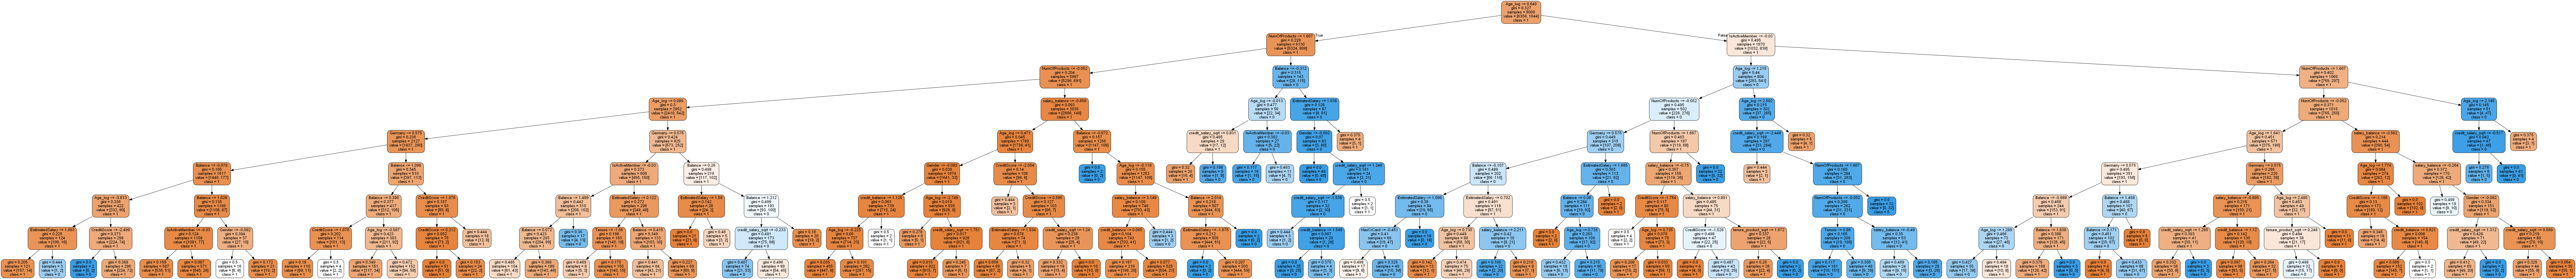

In [44]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import os

X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.20, random_state=42)

dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

name = list(x)

export_graphviz(
        dt_clf,
        out_file=image_path("tree.dot"),
        feature_names=name,
        class_names=["1","0"],
        rounded=True,
        filled=True
    )

path_png = os.path.join(PROJECT_ROOT_DIR, "tree.png")
Image(path_png)

# Model Evaluation

## Confusion Matrix & Generalization Performance 

In [30]:
# confusion matrix
y_pred_con = cross_val_predict(dt_clf, X_train, y_train,cv =10)
print(confusion_matrix(y_train, y_pred_con))
print("")

# Accuracy
scores=cross_val_score(dt_clf, X_train, y_train, cv=10)
print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))
print(scores)
print("")

# precison 
scores_p=cross_val_score(dt_clf, X_train, y_train, cv=10, scoring='precision')
print("Precision: %0.3f (+/- %0.3f)" % (scores_p.mean(), scores_p.std() * 2))
print(scores_p)
print("")

# recall
scores_r=cross_val_score(dt_clf, X_train, y_train, cv=10, scoring='recall')
print("Recall: %0.3f (+/- %0.3f)" % (scores_r.mean(), scores_r.std() * 2))
print(scores_r)
print("")

[[6035  321]
 [ 875  769]]

Accuracy: 0.851 (+/- 0.019)
[0.85268414 0.84644195 0.83895131 0.85393258 0.865      0.84625
 0.8698373  0.84105131 0.8485607  0.84230288]

Precision: 0.709 (+/- 0.087)
[0.74736842 0.69811321 0.67307692 0.73529412 0.76415094 0.67521368
 0.76785714 0.62416107 0.72164948 0.68627451]

Recall: 0.468 (+/- 0.092)
[0.43030303 0.44848485 0.42424242 0.45454545 0.49390244 0.48170732
 0.52439024 0.56707317 0.42682927 0.42682927]



## Fitting curve - Decision Tree

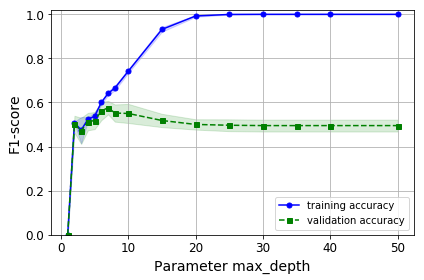

In [22]:
X_train, X_test, y_train, y_test = train_test_split(xscaled, y, test_size=0.20, random_state=42)
############################# Parameters - Varying Complexity #############################

param_range = [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20, 25, 30, 35, 40, 50]

########################## Estimate Scores - Varying Complexity ##########################

# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42), #Build Logistic Regression Models
                X=X_train, 
                y=y_train, 
                param_name="max_depth", 
                param_range=param_range,
                cv=10,    
                scoring="f1", 
                n_jobs=4) 


# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) # Compute the arithmetic mean along the specified axis.
train_std = np.std(train_scores, axis=1)   # Compute the standard deviation along the specified axis.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

############################## Visualization - Fitting Graph ##############################

# Plot train accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('F1-score')
plt.ylim([0, 1.02]) # y limits in the plot
plt.tight_layout()
# plt.savefig('Fitting_graph_LR.png', dpi=300)
plt.show()           # Display the figure



## ROC Curve for kNN, Decision Tree, Logistic Regression

10-fold cross validation:

ROC AUC: 0.74 (+/- 0.02) [Logistic regression]
ROC AUC: 0.83 (+/- 0.02) [Decision tree]
ROC AUC: 0.80 (+/- 0.01) [kNN]


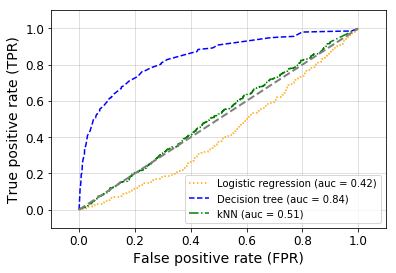

In [36]:
# Label the classifiers
clf3 = knn_clf
clf2 = dt_clf
clf1 = lr_clf
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [clf1, clf2, clf3]

#################################### Cross - Validation ####################################
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

print('10-fold cross validation:\n')
# Note: We are assuming here that the data is standardized. For the homework, you need to make sure the data is standardized.
for clf, label in zip([clf1, clf2, clf3], clf_labels): #For all classifiers 
    scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=xscaled,
                             y=y,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" #Print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # Colors for visualization
linestyles = [':', '--', '-.', '-']        # Line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
    fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
    plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

## Profit Curve

In [ ]:
def standard_confusion_matrix(y_true, y_pred):
    '''
    Reformat confusion matrix output from sklearn for plotting profit curve.
    '''
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

def plot_profit_curve(pipeline, costbenefit_mat, y_proba, y_test):
    '''
    Plot profit curve.

    INPUTS:
    - model object
    - cost benefit matrix in the same format as the confusion matrix above
    - predicted probabilities
    - actual labels
    '''

    # Profit curve data
    profits = [] # one profit value for each T (threshold)
    thresholds = sorted(y_proba, reverse=True)

    # For each threshold, calculate profit - starting with largest threshold
    for T in thresholds:
        y_pred = (y_proba > T).astype(int)
        confusion_mat = standard_confusion_matrix(y_train, y_pred_con)
        # Calculate total profit for this threshold
        profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
        profits.append(profit)

    # Profit curve plot
    model_name = pipeline.named_steps['classifier'].__class__.__name__
    max_profit = max(profits)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per user'.format(model_name, max_profit))

In [ ]:
costbenefit_mat = np.array([[1000, ],
                            [0, 0]])

clfs.plot_profit_curve(costbenefit_mat, X_test, y_test)